## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
import scipy
import os
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_boston
from scipy.stats import norm
from scipy.stats import geom
warnings.filterwarnings('ignore')

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?

In [2]:
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print(f'Boston Dataset has:\n{boston_dataset.data.shape[0]} samples\n{boston_dataset.data.shape[1]} features\n')
boston_df.info()
print('\n')
boston_df.describe(include = "all")

Boston Dataset has:
506 samples
13 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.


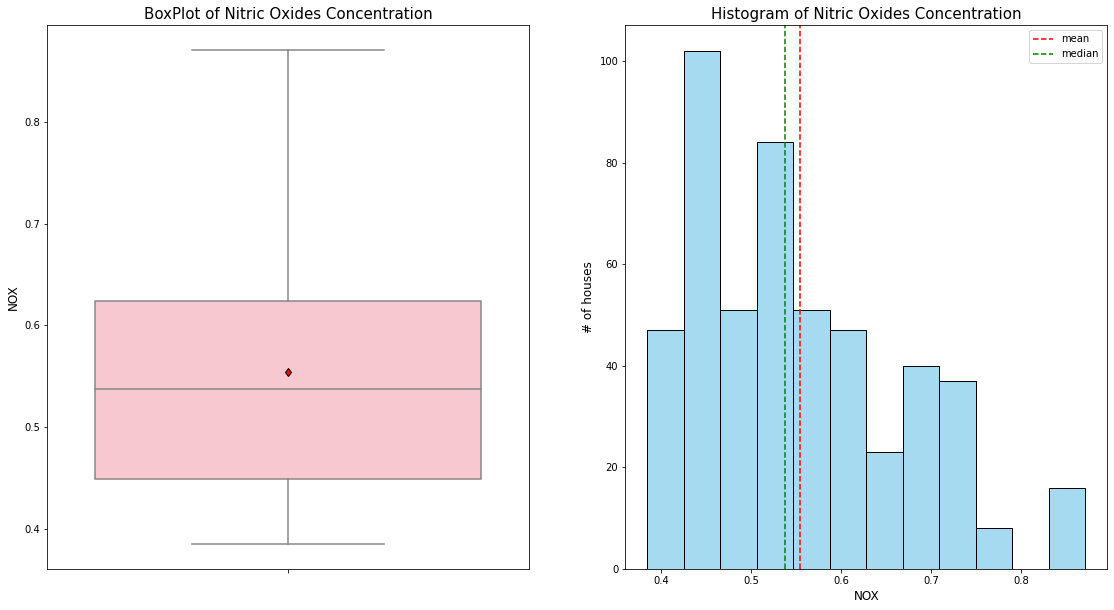

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(19,10))

box = sns.boxplot(y='NOX', data=boston_df, ax=axes[0], color='pink', showmeans=True,
                  meanprops={"marker":"d","markerfacecolor":"red", "markeredgecolor":"black"})
box.set_title("BoxPlot of Nitric Oxides Concentration", fontsize=15)
box.set_ylabel('NOX', fontsize=12)
box.set_xlabel('')

hist = sns.histplot(x='NOX', data=boston_df, ax=axes[1], color='skyblue')
hist.axvline(boston_df['NOX'].mean(), color='r', linestyle='--', label='mean')
hist.axvline(boston_df['NOX'].quantile(0.5), color='g', linestyle='--', label='median')
hist.set_title("Histogram of Nitric Oxides Concentration", fontsize=15)
hist.set_ylabel('# of houses', fontsize=12)
hist.set_xlabel('NOX', fontsize=12)
hist.legend()

The 'NOX' variable defines the nitric oxides concentration (parts per 10 million).So it make sense that most of the houses scattered around the low values of nox concentration (between 0.4 to 0.55).

As we can see both from the boxplot and from the histogram, the 'NOX' distribution is right-skewed (to ensure that, we could observe that the median comes before the mean).<br>We could infer from it that there are houses with high values of NOX which we refer to as 'outliers', that is because their NOX value is significantly different from the NOX value of most of the houses.

3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

[Text(0.5, 1.0, 'Correlation Matrix Visualization')]

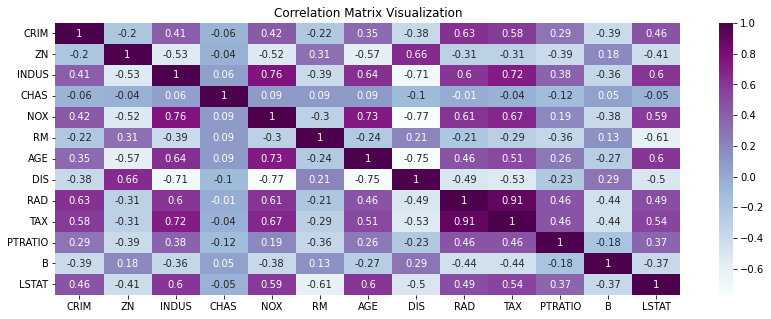

In [6]:
fig, axes = plt.subplots(figsize=(14,5))

correlation_matrix = boston_df.corr().round(2)
cor_heatmap = sns.heatmap(data=correlation_matrix, annot=True, ax=axes, cmap=plt.cm.BuPu)
cor_heatmap.set(title='Correlation Matrix Visualization')

<ins>Correlated features:</ins>

* RAD & TAX - 0.91
* NOX & INDUS - 0.76
* AGE & NOX - 0.73
* DIS & NOX - (-0.77)
* AGE & DIS - (-0.75)

$\Rightarrow$ A feature with an unusual behavior is 'CHAS'. It seems that this feature is not correlated with any of the other features.<br>Altough its type is float, by looking at the description of the dataset we could see that this is a dummy variable. A dummy variable gets a value of '0' or '1', regarding 'CHAS' it gets 1 if an house tract bounds river and 0 otherwise.

4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot)

The correlation value between 'RAD' and 'TAX' is 0.91


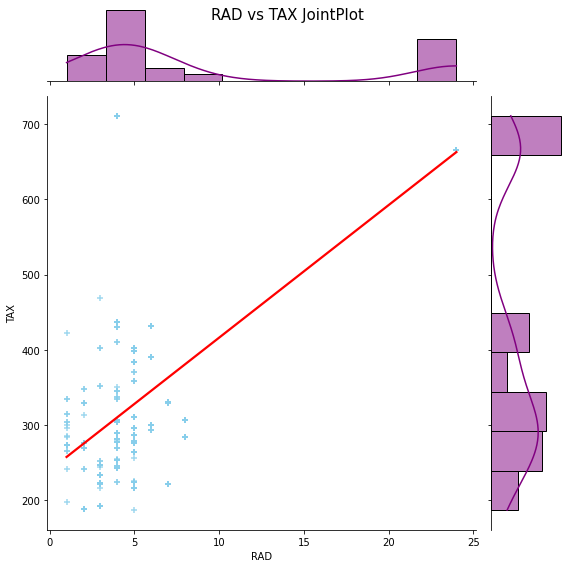

In [12]:
jp_1 = sns.jointplot(data=boston_df, x="RAD", y="TAX", kind="reg", marker='+', height=8,
              joint_kws={'color':'skyblue', 'ci':None, 'line_kws':{'color':'red'}}, 
              marginal_kws={'color':'purple'})
jp_1.fig.suptitle('RAD vs TAX JointPlot', fontsize=15)
print(f"The correlation value between 'RAD' and 'TAX' is {np.corrcoef((boston_df['RAD'],boston_df['TAX']))[1][0]:.2f}\n")

The correlation value between 'NOX' and 'DIS' is -0.77



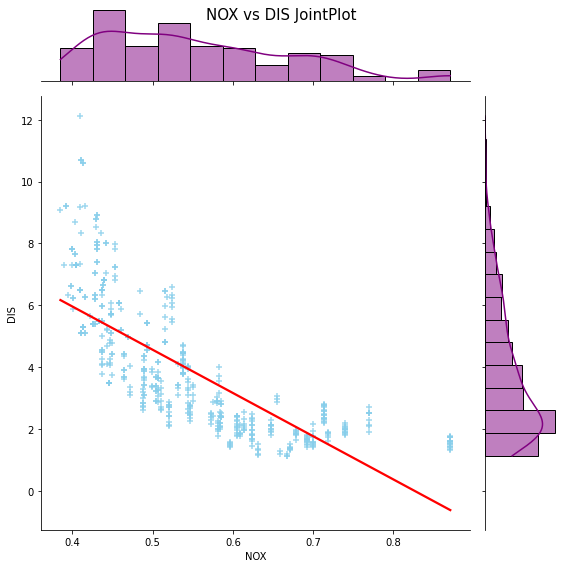

In [16]:
jp_2 = sns.jointplot(data=boston_df, x="NOX", y="DIS", kind="reg", marker='+', height=8,
              joint_kws={'color':'skyblue', 'ci':None, 'line_kws':{'color':'red'}},
              marginal_kws={'color':'purple'})
jp_2.fig.suptitle('NOX vs DIS JointPlot', fontsize=15)
print(f"The correlation value between 'NOX' and 'DIS' is {np.corrcoef((boston_df['NOX'],boston_df['DIS']))[1][0]:.2f}\n")

5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

1st quartile value -> 45
3rd quartile value -> 94


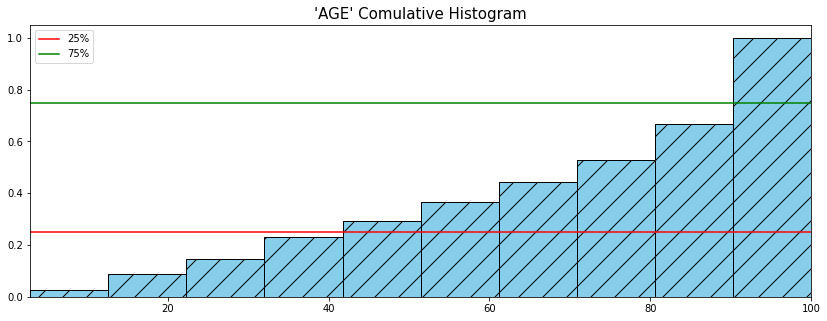

In [51]:
fig, axes = plt.subplots(figsize=(14,5))
plt.hist(data=boston_df, x='AGE', cumulative=True, density=True, color='skyblue', hatch='/', edgecolor='k')
plt.xlim((boston_df['AGE'].min(),100))
plt.axhline(0.25, color='r', linestyle='-', label='25%')
plt.axhline(0.75, color='g', linestyle='-', label='75%')
plt.title("'AGE' Comulative Histogram", fontsize=15)
plt.legend()
print(f"1st quartile value -> {boston_df['AGE'].quantile(0.25):.0f}\n3rd quartile value -> {boston_df['AGE'].quantile(0.75):.0f}")

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

Text(0, 0.5, '# of houses')

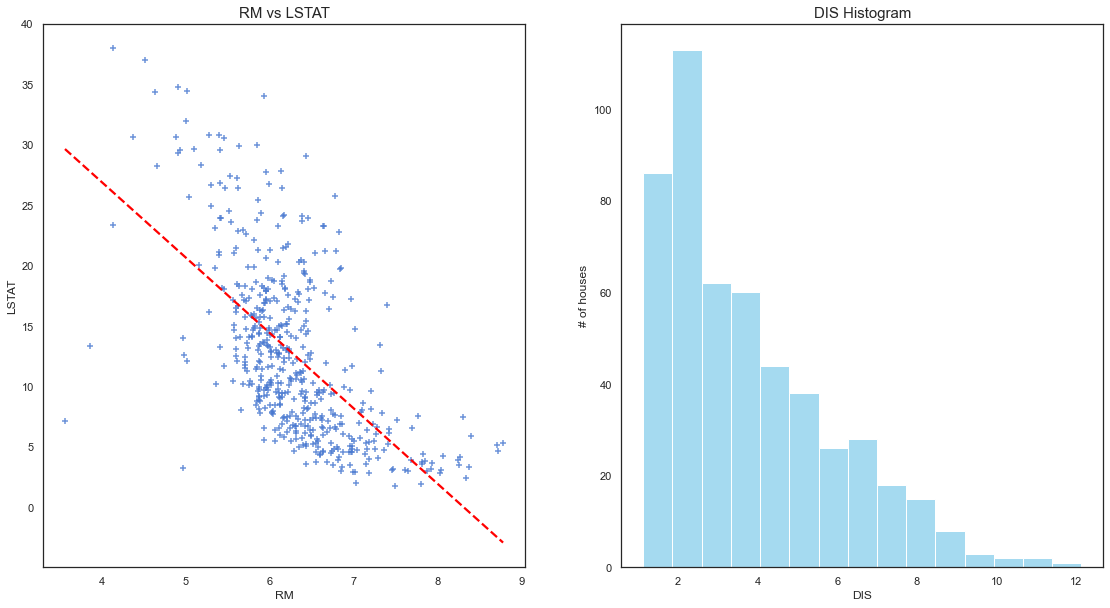

In [248]:
# sns.pairplot(boston_df) # uncomment to observe all of the correlations in the dataset

fig, axes = plt.subplots(1, 2, figsize=(19,10))
sns.regplot(x='RM', y='LSTAT', data=boston_df, fit_reg=True, ax=axes[0],
            ci=None, marker='+', line_kws={'color':'red', 'linestyle':'--'}).set_title('RM vs LSTAT', fontsize=15)
sns.histplot(boston_df['DIS'], ax=axes[1], color='skyblue')
axes[1].set_title('DIS Histogram', fontsize=15)
axes[1].set_ylabel('# of houses', fontsize=12)

1. LSTAT vs RM - LSTAT is the percentage of homeowners in the neighborhood considered "lower class", and RM is the number of room in the house. Those two variables are correlated, such that for a lower precentage of "lower class" homeowners there are more rooms in average. An explanation for this trend might be the house price that is supposed to be higher for a larger number of rooms, and a low income of "lower class" homeowners.


2. DIS - This is a right-skewed distribution, it seems that the further away you get from the five Boston employement centers, the less houses observed in the data. This phenomenon could have been expected because it is makse sense that people will tend to live relatively close to their work.  

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

The probabilites must sum to 1, thus the total number of parameters that define the joint distribution of $X, Y$ and $Z$ is $(n \cdot m \cdot k)-1 = 2nm-1$

#### 2.B

For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

$X, Y$ and $Z$ are independent if $P(X=x, Y=y, Z=z) = P(X=x) \cdot P(Y=y) \cdot P(Z=z)$

In the case of independecy, the number of parameters that define the joint distribution of $X, Y$ and $Z$ is $(n-1) + (m-1) + (k-1) = (n-1) + (m-1) + 1 = n + m -1$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

$X, Y$ are conditionaly independent given $Z$ if $P(X=x, Y=y, Z=z) = P(X|Z) \cdot P(Y|Z) \cdot P(Z)$

In that case the number of parameters that define the joint distribution of $X, Y$ and $Z$ is $(n-1)k + (m-1)k + k = 2(n-1) + 2(m-1) +2$

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

Let $X \sim N(0,1) , Y \sim N(0,1)$ define the distributions of bus A and bus B arrival time (minutes) respectively.<br>Let $Z$ be a dummy variable which indicates if there is a bus roadblock only for bus A and bus B, such that the first bus arrives to the roadblock is not delayed and the second one is being delayed for 5 minutes.

$X$ and $Y$ are unconditionally independent  because each of the variables describes the bus arrival time, and the 2 buses are not dependent on each other.
However, $X$ and $Y$ are $\textbf{Not}$ conditionally independent, because the first value that arrives to the roadblock effects the arrival time of the second bus. 

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [17]:
csv_path = 'C:\\Users\\Omer Gralnik\\Desktop\\Machine Learning & Data science\\First Year\\Semester A\\Statistics & Data Analysis\\Datasets\\GMD_2021.csv'

Text(0.5, 1.0, 'GMD_2021 Distribution')

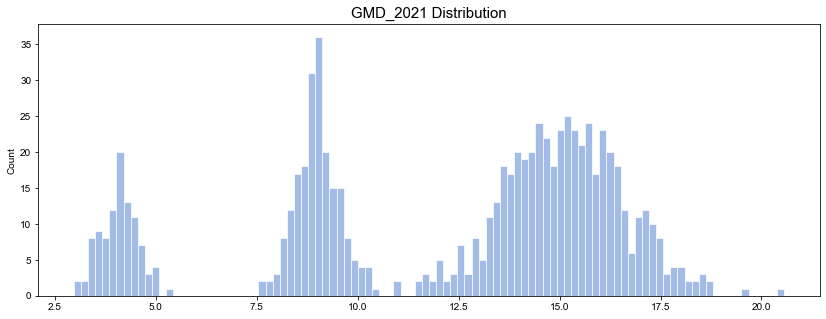

In [18]:
fig, axes = plt.subplots(figsize=(14,5))
sns.set(style='white', palette="muted", color_codes=True)

data = pd.read_csv(csv_path, header=None, index_col=0)
sns.histplot(data, bins=100, ax=axes, legend=False).set_title('GMD_2021 Distribution', fontsize='15')

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [12]:
## Using visual separation ##
first_cluster = data[data.iloc[:,0]<7]
second_cluster = data[(data.iloc[:,0]<=11) & (data.iloc[:,0]>=7)]
third_cluster = data[data.iloc[:,0]>11]

w2 = 0.25
w1 = (len(first_cluster)/len(second_cluster))*w2
w3 = 1 - (w1 + w2)

print(f"\n## Visual Separation ##\n{'-'*23}\n")
print(f"Means According to visual separation\n{'-'*36}\nmu1 = {first_cluster.mean()[1]:.2f}\nmu2 = {second_cluster.mean()[1]:.2f}\nmu3 = {third_cluster.mean()[1]:.2f}\n")
print(f"Stds According to visual separation\n{'-'*35}\nsig1 = {first_cluster.std()[1]:.2f}\nsig2 = {second_cluster.std()[1]:.2f}\nsig3 = {third_cluster.std()[1]:.2f}\n")
print(f"Weights According to visual separation\n{'-'*35}\nw1 = {w1:.2f}\nw2 = {w2:.2f}\nw3 = {w3:.2f}\n")


## Using EM ##
GMM = GaussianMixture(n_components=3, random_state=0).fit(data)
print(f"\n## EM ##\n{'-'*10}\n")
print(f"Means according to EM:\n{'-'*23}\nmu1 = {GMM.means_[2][0]:.2f}\nmu2 = {GMM.means_[1][0]:.2f}\nmu3 = {GMM.means_[0][0]:.2f}\n")
print(f"Stds according to EM:\n{'-'*22}\nsig1 = {GMM.covariances_[2][0][0]**0.5:.2f}\nsig2 = {GMM.covariances_[1][0][0]**0.5:.2f}\nsig3 = {GMM.covariances_[0][0][0]**0.5:.2f}\n")
print(f"Weights according to EM:\n{'-'*25}\nw1 = {GMM.weights_[2]:.3f}\nw2 = {GMM.weights_[1]:.3f}\nw3 = {GMM.weights_[0]:.3f}\n")


## Visual Separation ##
-----------------------

Means According to visual separation
------------------------------------
mu1 = 4.08
mu2 = 9.01
mu3 = 15.12

Stds According to visual separation
-----------------------------------
sig1 = 0.47
sig2 = 0.55
sig3 = 1.48

Weights According to visual separation
-----------------------------------
w1 = 0.12
w2 = 0.25
w3 = 0.63


## EM ##
----------

Means according to EM:
-----------------------
mu1 = 4.08
mu2 = 9.00
mu3 = 15.10

Stds according to EM:
----------------------
sig1 = 0.47
sig2 = 0.53
sig3 = 1.50

Weights according to EM:
-------------------------
w1 = 0.125
w2 = 0.250
w3 = 0.625



#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

Text(0.5, 1.0, "Inferred GMM Distribution's PDF")

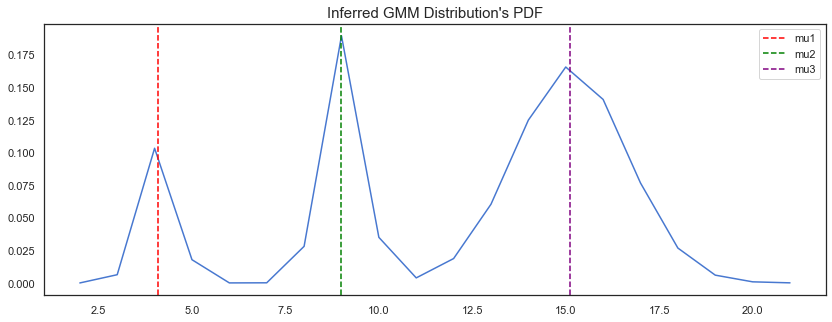

In [13]:
fig, axes = plt.subplots(figsize=(14,5))

x = np.arange(data.min()[1]-1, data.max()[1]+1)
gmm_1 = GMM.weights_[2]*norm.pdf(x, loc=GMM.means_[2][0], scale=GMM.covariances_[2][0][0]**0.5)
gmm_2 = GMM.weights_[1]*norm.pdf(x, loc=GMM.means_[1][0], scale=GMM.covariances_[1][0][0]**0.5)
gmm_3 = GMM.weights_[0]*norm.pdf(x, loc=GMM.means_[0][0], scale=GMM.covariances_[0][0][0]**0.5)

dist = gmm_1+gmm_2+gmm_3
plt.plot(np.linspace(np.floor(data.min()), np.ceil(data.max()), num=20), dist)
plt.axvline(GMM.means_[2][0], color='red', linestyle='--', label='mu1')
plt.axvline(GMM.means_[1][0], color='green', linestyle='--', label='mu2')
plt.axvline(GMM.means_[0][0], color='purple', linestyle='--', label='mu3')
plt.legend()
plt.title("Inferred GMM Distribution's PDF", fontsize=15)

We decided to set the PDF's line limits to start with the minimum value in the dataset and to end with the maximum value in the dataset.<br>That is because of the fact that the PDF line of the distribution is constant, and will always have the same shape, as could be obsereved in the example below.<br>So this subset has to be done in order to fit it to the data

Text(0.5, 0.98, 'Wrong line limits')

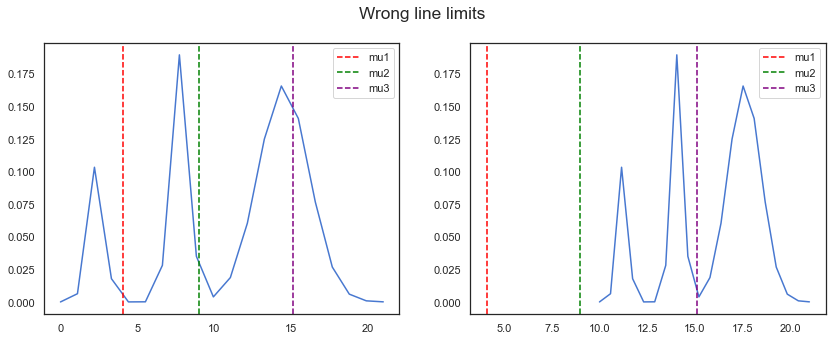

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(np.linspace(0, np.ceil(data.max()), num=20), dist)
axes[0].axvline(GMM.means_[2][0], color='red', linestyle='--', label='mu1')
axes[0].axvline(GMM.means_[1][0], color='green', linestyle='--', label='mu2')
axes[0].axvline(GMM.means_[0][0], color='purple', linestyle='--', label='mu3')
axes[0].legend()

axes[1].plot(np.linspace(10, np.ceil(data.max()), num=20), dist)
axes[1].axvline(GMM.means_[2][0], color='red', linestyle='--', label='mu1')
axes[1].axvline(GMM.means_[1][0], color='green', linestyle='--', label='mu2')
axes[1].axvline(GMM.means_[0][0], color='purple', linestyle='--', label='mu3')
axes[1].legend()

fig.suptitle("Wrong line limits", fontsize="x-large")

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

Now it is not possible to estimate the unknown parameters using the 'visual separation' that we have performed in section A. That is because only by viewing the data it looks like a GMD with k=3, hence it is easy to separate it visually. However, if the data comes from a GMD with k=4 then it impossible to identify the 4 distributions visually.

In contrast, it is still possible to estimate the unkown parametrs using the 'EM' algorithm. This algorithm takes as an input the existing parameters and data, and maximize the likelihood esimates of the model parameters. So the fact that there are 4 gaussians instead of 3 doesn't effect the ability of the EM algorithm to estimate the unknown parameters.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

<ins>Direct Distribution</ins>

* Create 3 gaussian distributions and set the mean and std of each distribution. The size of each distribution will be decided by its weight multiplied by the total number of observations
* Create a GMM by concatenating those 3 gaussians

<ins>Random Choice</ins>

* Create 3 gaussian distribution similarly as performed in the 'Direct Distribution' way
* Create an empty list and initialize a for loop that will iterate 'n' times and in each iteration of the for loop generate a random variable 'p' between 0 to 1
* Now devide the loop for three sections:
    * if p < w1 $\rightarrow$ add an observation from the first distribution to the list
    * if w1 <= p < w1+w2 $\rightarrow$ add an observation from the second distribution to the list
    * if p => w1+w2 $\rightarrow$ add an observation from the third distribution to the list
* That way, each time we would get a different GMM distribution, but the parameters (mean, std, weight) remain the same

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


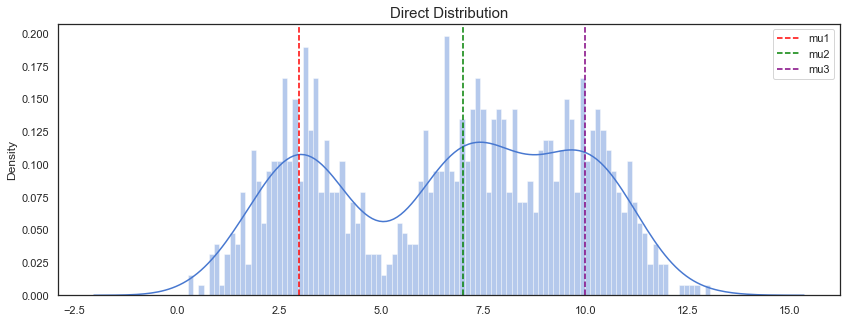

In [19]:
fig = plt.figure(figsize=(14,5))
sns.set(style='white', palette="muted", color_codes=True)

# define the parameters
n = 1000
mu1, mu2, mu3 = 3, 7, 10
sig1, sig2, sig3 = 1, 1, 1
w1, w2, w3 = 0.33, 0.33, 0.33

# create the 3 distributions
gmm_1 = np.random.normal(loc=mu1, scale=sig1, size=int(np.ceil(n*w1)))
gmm_2 = np.random.normal(loc=mu2, scale=sig2, size=int(np.ceil(n*w2)))
gmm_3 = np.random.normal(loc=mu3, scale=sig3, size=int(np.ceil(n*w3)))

# concatenate the distributions to a GMM
direct_dist = np.concatenate([gmm_1, gmm_2, gmm_3])

# plot the GMM
sns.distplot(direct_dist, bins=100).set_title('Direct Distribution', fontsize=15)
plt.axvline(mu1, color='red', linestyle='--', label='mu1')
plt.axvline(mu2, color='green', linestyle='--', label='mu2')
plt.axvline(mu3, color='purple', linestyle='--', label='mu3')
plt.legend()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

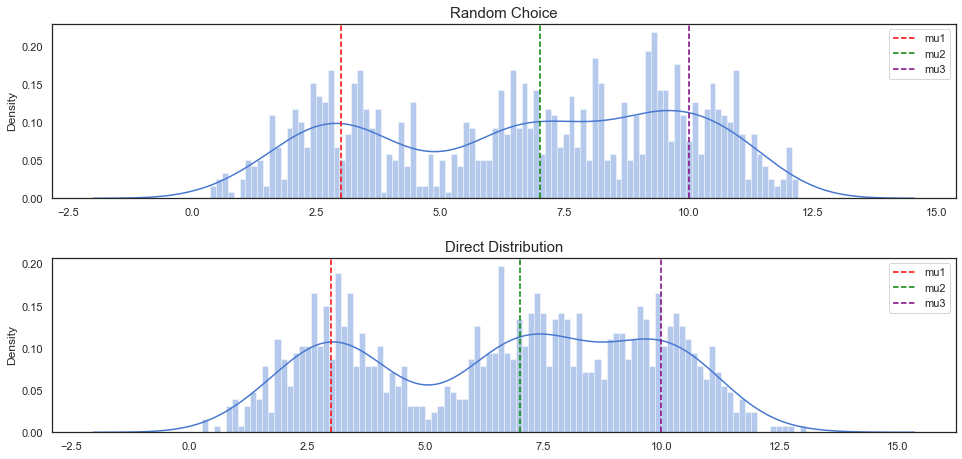

In [25]:
# create the 3 distributions (different method)
gaussian1 = scipy.stats.norm.rvs(loc=mu1, scale=sig1, size=int(np.ceil(n*w1)))
gaussian2 = scipy.stats.norm.rvs(loc=mu2, scale=sig2, size=int(np.ceil(n*w2)))
gaussian3 = scipy.stats.norm.rvs(loc=mu3, scale=sig3, size=int(np.ceil(n*w3)))

# create an empty list and initialize the loop
gmm_data = []
for i in range(1000):
    p = scipy.stats.uniform.rvs(size=1)
    if p < w1:
        gmm_data.append(np.random.choice(a=gaussian1, size=1))
    elif p >= w1 and p < w1+w2:
        gmm_data.append(np.random.choice(a=gaussian2, size=1))
    else: 
        gmm_data.append(np.random.choice(a=gaussian3, size=1))

# plot the GMM & compare between the two ways
fig,ax = plt.subplots(2,1, figsize=(14,7))
fig.tight_layout(pad=3.0)
sns.distplot(gmm_data, bins=100, ax=ax[0])
sns.distplot(direct_dist, bins=100, ax=ax[1])
ax[0].set_title('Random Choice', fontsize=15)
ax[1].set_title('Direct Distribution', fontsize=15)
ax[0].axvline(mu1, color='red', linestyle='--', label='mu1')
ax[0].axvline(mu2, color='green', linestyle='--', label='mu2')
ax[0].axvline(mu3, color='purple', linestyle='--', label='mu3')
ax[0].legend()
ax[1].axvline(mu1, color='red', linestyle='--', label='mu1')
ax[1].axvline(mu2, color='green', linestyle='--', label='mu2')
ax[1].axvline(mu3, color='purple', linestyle='--', label='mu3')
ax[1].legend()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [26]:
an_sal = norm(loc=70000, scale=30000)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [27]:
print(f"{an_sal.cdf(50000)*100:.0f}% of the people in the company earn less than 50,000 RCU")

25% of the people in the company earn less than 50,000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [28]:
upper_bound = an_sal.cdf(65000)
lower_bound = an_sal.cdf(45000)

print(f"{(upper_bound-lower_bound)*100:.0f}% of the people in the company earn between 45,000 RCU and 65,000 RCU")

23% of the people in the company earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [29]:
print(f"{(1-an_sal.cdf(70000))*100:.0f}% of the people in the company earn more than 70,000 RCU")

50% of the people in the company earn more than 70,000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [30]:
print(f"We expect {(1-an_sal.cdf(140000))*1000:.2f}~({(1-an_sal.cdf(140000))*1000:.0f}) people to earn more than 140,000 RCU")

We expect 9.82~(10) people to earn more than 140,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [31]:
def coupon_collector_mean(n: int):
    return n*sum([1 / i for i in range(1,n+1)])

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [32]:
def coupon_collector_var(n: int):
    ex_list = [1/i for i in range(1,n+1)]
    n_hn=n*sum(ex_list)
    ex_list_sq = [1/(i**2) for i in range(1,n+1)]
    return (n**2)*sum(ex_list_sq)-n_hn

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [33]:
def coupon_collector_exact(N: int, K: int):
    for i in range(1, N+1):
        x = geom((N-i+1)/N)
        dist_x = [x.pmf(j) for j in range(1, K+1)]
        if i == 1:
            conv_count = dist_x
        else:
            conv_count = np.convolve(conv_count, dist_x)
        
    value_dict = {}
    for i in range(N+1):
        value_dict[N+i] = conv_count[i]

    p_below_value = sum([value for key, value in value_dict.items() if key <= K])
    p_above_value = 1 - p_below_value

    return p_above_value


exact_value = coupon_collector_exact(30,60)
print(f'Using exact calculation:\n\nP(T_30 > 60) = {exact_value}')

Using exact calculation:

P(T_30 > 60) = 0.9940158432042814


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [34]:
def coupon_collector_checbicheff(n: int, x: int):
    c = (x-coupon_collector_mean(n))/n
    return 1 - coupon_collector_var(n)/c**2/(n**2)

bound = coupon_collector_checbicheff(30, 60)
print(f"Using Chebicheff's inequality, the bound is:\n\nP(T_30 > 60) >= {bound:.4f}\n")
print(f"While the exact value is {exact_value:.4f}")

Using Chebicheff's inequality, the bound is:

P(T_30 > 60) >= 0.6284

While the exact value is 0.9940
